In [51]:
# Importación de librerias

import mlflow
from mlflow.models import infer_signature

import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Información del dataset

Here’s the table in Markdown format:  


| Feature                         | Type   |
|----------------------------------|--------|
| is_male                         | bool   |
| ethnicity                       | string |
| parental_level_of_education     | int8   |
| has_standard_lunch              | bool   |
| has_completed_preparation_test  | bool   |
| reading_score                   | int64  |
| writing_score                   | int64  |
| math_score                      | int64  |


In [52]:
# Carga del dataset de resultados de matemáticas

dataset = load_dataset("mstz/student_performance", "math")
dataset = dataset['train'].to_pandas()

#Validación de la carga del dataset

dataset.head()


,is_male,ethnicity,parental_level_of_education,has_standard_lunch,has_completed_preparation_test,reading_score,writing_score,has_passed_math_exam
0,False,group D,2,True,True,70,78,0
1,True,group D,5,True,False,93,87,1
2,False,group D,2,False,False,76,77,0
3,True,group B,2,False,False,70,63,1
4,False,group D,5,True,False,85,86,1


In [53]:
# Definición de las variables de entrada y salida
X=dataset.drop('has_passed_math_exam',axis=1)
y=dataset['has_passed_math_exam']


In [54]:
# Codificación de las variables categoricas

categoricas = ['ethnicity', 'parental_level_of_education']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
Xenco = encoder.fit_transform(X[categoricas])
Xenco_df = pd.DataFrame(Xenco , columns=encoder.get_feature_names_out(categoricas))

# Reemplazo de las variables originales por las codificadas
X = X.drop(categoricas, axis=1)
X = pd.concat([X, Xenco_df], axis=1)

In [55]:
# Separación del dataset para entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Definición del modelo de DecisionTree para la predicción de la variable y

params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

modelo = DecisionTreeClassifier(**params) #Iniciación del modelo
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test) #Predicción de los datos de prueba

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Calculo de las función de perdida de la variable y

y_train_proba = modelo.predict_proba(X_train)
y_test_proba = modelo.predict_proba(X_test)

cse_train = log_loss(y_train, y_train_proba)
cse_test = log_loss(y_test, y_test_proba)


In [68]:
# Ajuste de las variables en booleans para las redes neuronal

X_trainNN = X_train.astype('float32')
X_testNN = X_test.astype('float32')

In [71]:
# Red Neuronal con Dropout
modelNNdrop = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),  # Regularización
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
modelNNdrop.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con historial
EPOCHSNNdrop = 100
historyNNdrop = modelNNdrop.fit(X_trainNN, y_train, epochs=EPOCHSNNdrop, batch_size=32, validation_data=(X_testNN, y_test))

# Evaluación del modelo
y_predNNdrop = (modelNNdrop.predict(X_testNN) > 0.5).astype("int32")
accuracyNNdrop = accuracy_score(y_test, y_predNNdrop)
precisionNNdrop = precision_score(y_test, y_predNNdrop)
recallNNdrop = recall_score(y_test, y_predNNdrop)
f1NNdrop = f1_score(y_test, y_predNNdrop)

# Imprimir métricas
txt = f"""
Accuracy: {accuracyNNdrop:.4f}
Precision: {precisionNNdrop:.4f}
Recall: {recallNNdrop:.4f}
F1 Score: {f1NNdrop:.4f}
"""
print(txt)

# Almacenar historial de pérdidas
train_lossesNNdrop = historyNNdrop.history['loss']
val_lossesNNdrop = historyNNdrop.history['val_loss']


Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 2.0975 - accuracy: 0.5838 - val_loss: 0.6121 - val_accuracy: 0.7300
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1041 - accuracy: 0.6112 - val_loss: 0.5210 - val_accuracy: 0.7300
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.5938 - val_loss: 0.5394 - val_accuracy: 0.7300
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7565 - accuracy: 0.6062 - val_loss: 0.6809 - val_accuracy: 0.7400
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.6463 - val_loss: 0.6382 - val_accuracy: 0.7300
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6575 - val_loss: 0.6067 - val_accuracy: 0.7300
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6625 - val_loss: 0.6102 - val_accuracy: 0.7300
Epoch 8/100
2

In [ ]:
# Definición del modelo de red neuronal para la predicción de la variable y
modeloKeras = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
modeloKeras.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con historial
EPOCHS = 100
history = modeloKeras.fit(X_trainNN, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_testNN, y_test))

# Evaluación del modelo
y_predNN = (modeloKeras.predict(X_testNN) > 0.5).astype("int32")
accuracyNN = accuracy_score(y_test, y_predNN)
precisionNN = precision_score(y_test, y_predNN)
recallNN = recall_score(y_test, y_predNN)
f1NN = f1_score(y_test, y_predNN)

# Imprimir métricas
txt = f"""
Accuracy: {accuracyNN:.4f}
Precision: {precisionNN:.4f}
Recall: {recallNN:.4f}
F1 Score: {f1NN:.4f}
"""
print(txt)

# Almacenar historial de pérdidas
train_losses = history.history['loss']
val_losses = history.history['val_loss']

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.7469 - accuracy: 0.6388 - val_loss: 0.5305 - val_accuracy: 0.7300
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7038 - val_loss: 0.5177 - val_accuracy: 0.7350
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7075 - val_loss: 0.5082 - val_accuracy: 0.7350
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.6975 - val_loss: 0.5875 - val_accuracy: 0.7650
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7150 - val_loss: 0.5553 - val_accuracy: 0.7950
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7188 - val_loss: 0.5076 - val_accuracy: 0.7750
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7075 - val_loss: 0.4739 - val_accuracy: 0.7400
Epoch 8/100
2

# Monitoreo con Ml-Flow

In [ ]:
def plot_training_history(history):
    """Graficar el historial de entrenamiento"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Presición
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Perdida
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.tight_layout()
    
    return fig 

25/25 [==============================] - 0s 3ms/step


2025/03/03 23:32:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\lfcb\AppData\Local\Temp\tmp8bc0jgze\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/03/03 23:32:10 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "is_male",
      "has_standard_lunch",
      "has_completed_preparation_test",
      "reading_score",
      "writing_score",
      "ethnicity_group A",
      "ethnicity_group B",
      "ethnicity_group C",
      "ethnicity_group D",
      "ethnicity_group E",
      "parental_level_of_education_0",
      "parental_level_of_education_1",
      "parental_level_of_education_2",
      "parental_level_of_education_3",
      "parental_level_of_education_4",
      "parental_level_of_education_5"
    ],
    "data": [
      [
       

🏃 View run bedecked-finch-239 at: http://127.0.0.1:5000/#/experiments/339918509839470844/runs/3ff6ea54ef8540c8a838cbbb14021d3a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/339918509839470844
25/25 [==============================] - 0s 889us/step


2025/03/03 23:32:18 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\lfcb\AppData\Local\Temp\tmpx81ewotx\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/03/03 23:32:18 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "is_male",
      "has_standard_lunch",
      "has_completed_preparation_test",
      "reading_score",
      "writing_score",
      "ethnicity_group A",
      "ethnicity_group B",
      "ethnicity_group C",
      "ethnicity_group D",
      "ethnicity_group E",
      "parental_level_of_education_0",
      "parental_level_of_education_1",
      "parental_level_of_education_2",
      "parental_level_of_education_3",
      "parental_level_of_education_4",
      "parental_level_of_education_5"
    ],
    "data": [
      [
       

🏃 View run lyrical-toad-312 at: http://127.0.0.1:5000/#/experiments/339918509839470844/runs/892be55b7cad4773ab76c66af30b1716
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/339918509839470844


2025/03/03 23:32:24 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\lfcb\AppData\Local\Temp\tmpxe60mdxx\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/03/03 23:32:24 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "is_male",
      "has_standard_lunch",
      "has_completed_preparation_test",
      "reading_score",
      "writing_score",
      "ethnicity_group A",
      "ethnicity_group B",
      "ethnicity_group C",
      "ethnicity_group D",
      "ethnicity_group E",
      "parental_level_of_education_0",
      "parental_level_of_education_1",
      "parental_level_of_education_2",
      "parental_level_of_education_3",
      "parental_level_of_education_4",
      "parental_level_of_education_5"
    ],
    "data": [
      [
       

🏃 View run useful-rook-665 at: http://127.0.0.1:5000/#/experiments/339918509839470844/runs/8a6b299710074dd5a969d9c7a5d8f8eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/339918509839470844


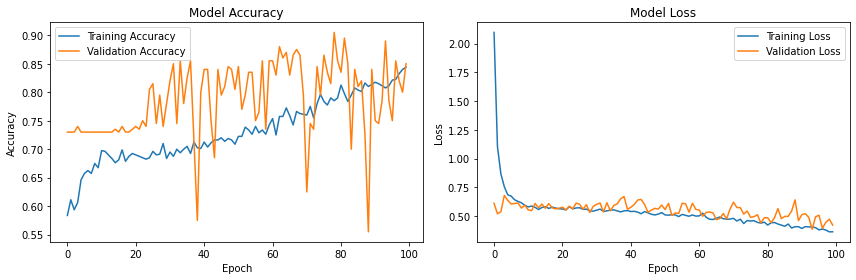

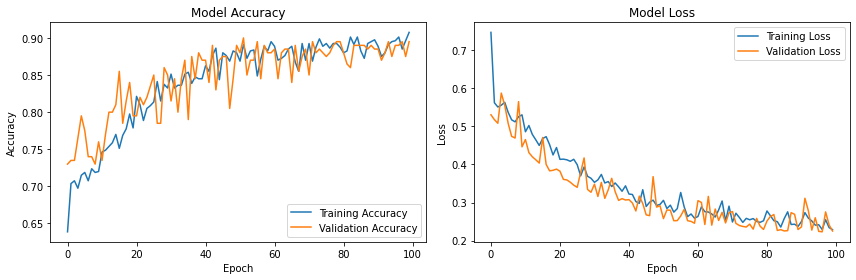

In [ ]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("Predicción de Resultado Prueba de Matemáticas")

# Start an MLflow run Keras  con Dropout
with mlflow.start_run():

    # Almacenar parametros del modelo
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("loss_function", "binary_crossentropy")
    mlflow.log_param("epochs", EPOCHSNNdrop)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("dropout_rate", 0.3)
    mlflow.log_param("layers", [128, 64, 32, 1])

    # Métricas de precision del modelo
    mlflow.log_metric("accuracy", accuracyNNdrop)
    mlflow.log_metric("precision", precisionNNdrop)
    mlflow.log_metric("recall", recallNNdrop)
    mlflow.log_metric("f1", f1NNdrop)
    
    # Almacenar función de costo del modelo
    
    mlflow.log_figure(plot_training_history(historyNNdrop), "lossNNdrop.png")

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("model_type", "Red Neuronal Keras con Dropout")

    # Infer the model signature
    signature = infer_signature(X_trainNN, modelNNdrop.predict(X_trainNN))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=modelNNdrop,
        artifact_path="matematicas-model-Keras-dropout",
        signature=signature,
        input_example=X_trainNN,
        registered_model_name="matematicas-Keras-dropout",
    )

# Start an MLflow run Keras
with mlflow.start_run():

    # Almacenar parametros del modelo
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("loss_function", "binary_crossentropy")
    mlflow.log_param("epochs", EPOCHS)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("layers", [64, 32, 1])

    # Métricas de precision del modelo
    mlflow.log_metric("accuracy", accuracyNN)
    mlflow.log_metric("precision", precisionNN)
    mlflow.log_metric("recall", recallNN)
    mlflow.log_metric("f1", f1NN)  
    
    # Almacenar función de costo del modelo
    
    mlflow.log_figure(plot_training_history(history), "lossNN.png")

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("model_type", "Red Neuronal Keras")

    # Infer the model signature
    signature = infer_signature(X_trainNN, modeloKeras.predict(X_trainNN))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=modeloKeras,
        artifact_path="matematicas-modelNN",
        signature=signature,
        input_example=X_trainNN,
        registered_model_name="matematicas-Keras",
    )

# Start an MLflow run DecisionTree
with mlflow.start_run():

    # Log the hyperparameters
    mlflow.log_params(params)

    # Métricas de precision del modelo
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)  

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("model_type","DecisionTree")

    # Infer the model signature
    signature = infer_signature(X_train, modelo.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=modelo,
        artifact_path="matematicas-model",
        signature=signature,
        input_example=X_train,
        registered_model_name="matematicas-decision-tree",
    )